<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Вывод:</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-1.0.2"><span class="toc-item-num">1.0.2&nbsp;&nbsp;</span>Вывод:</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-1.0.3"><span class="toc-item-num">1.0.3&nbsp;&nbsp;</span>Вывод:</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-1.0.4"><span class="toc-item-num">1.0.4&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Вывод:</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.0.3"><span class="toc-item-num">2.0.3&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.0.4"><span class="toc-item-num">2.0.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-3.0.0.1"><span class="toc-item-num">3.0.0.1&nbsp;&nbsp;</span>Линейная регрессия</a></span></li><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-3.0.0.2"><span class="toc-item-num">3.0.0.2&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.0.0.3"><span class="toc-item-num">3.0.0.3&nbsp;&nbsp;</span>Случайный лес</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>Вывод</a></span><ul class="toc-item"><li><span><a href="#Применим-модель-на-тестовой-выборке" data-toc-modified-id="Применим-модель-на-тестовой-выборке-3.0.1.1"><span class="toc-item-num">3.0.1.1&nbsp;&nbsp;</span>Применим модель на тестовой выборке</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.0.2"><span class="toc-item-num">3.0.2&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

###### 1.1. Откроем файлы и изучим их

In [110]:
#Загрузим необходимые библиотеки
import pandas as pd
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot as plt
import numpy as np 
import pylab 
import scipy.stats as stats
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.dummy import DummyRegressor

In [111]:
#Загрузим датасеты
try:
    df_train=pd.read_csv('C:/Users/ARTEM/Desktop/Project_DS/Сборный проект/gold_industry_train.csv')
    df_test=pd.read_csv('C:/Users/ARTEM/Desktop/Project_DS/Сборный проект/gold_industry_test.csv')
    df_full=pd.read_csv('C:/Users/ARTEM/Desktop/Project_DS/Сборный проект/gold_industry_full.csv')    
except:
    df_train=pd.read_csv('/datasets/gold_industry_train.csv')
    df_test=pd.read_csv('/datasets/gold_industry_test.csv')
    df_full=pd.read_csv('/datasets/gold_industry_full.csv')

In [112]:
#Взглянем на данные
datasets = [df_train, df_test, df_full]
for i in datasets:
    i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14579 entries, 0 to 14578
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14579 non-null  object 
 1   rougher.input.feed_au                               14579 non-null  float64
 2   rougher.input.feed_ag                               14579 non-null  float64
 3   rougher.input.feed_pb                               14507 non-null  float64
 4   rougher.input.feed_sol                              14502 non-null  float64
 5   rougher.input.feed_rate                             14572 non-null  float64
 6   rougher.input.feed_size                             14478 non-null  float64
 7   rougher.input.floatbank10_sulfate                   14548 non-null  float64
 8   rougher.input.floatbank10_xanthate                  14572 non-null  float64


In [113]:
# Посмотрим на данные
datasets = [df_train, df_test, df_full]
for i in datasets:
    display(i.describe())

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
count,14579.000000,14579.000000,14507.000000,14502.000000,14572.000000,14478.000000,14548.000000,14572.000000,14579.000000,14579.000000,...,13659.000000,14579.000000,14578.000000,14578.000000,14387.000000,14579.000000,14579.000000,14578.000000,14504.000000,14574.000000
mean,8.352941,8.877460,3.604221,36.561420,474.332784,58.922712,12.427399,5.994854,1104.208278,-379.367166,...,7.111347,43.979499,5.192145,9.923809,9.566676,66.759066,3.087939,9.731972,2.719985,10.612745
std,1.934376,1.922536,1.056063,5.209823,108.503552,22.407410,3.428939,1.152873,162.235606,94.652311,...,3.909951,5.471437,1.388014,1.706976,2.805654,10.619709,0.915187,2.358143,0.958929,2.871075
min,0.010000,0.010000,0.010000,0.010000,0.002986,0.049194,0.001083,0.000568,-0.042069,-657.949759,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.932996,7.341922,2.880490,34.093951,411.048483,47.278490,10.002832,5.304167,999.644856,-499.861797,...,3.784897,43.345906,4.283347,9.103183,7.860030,63.114596,2.505287,8.088928,2.036512,9.013412
50%,8.225284,8.715859,3.532399,37.097511,498.187968,54.361187,12.003320,6.003053,1000.982624,-300.314199,...,7.629968,44.975014,5.118647,10.046455,9.301970,67.962788,3.029238,9.818512,2.774847,10.670515
75%,9.832210,10.255843,4.257282,39.899799,549.586552,64.464926,14.929903,6.796632,1292.663971,-299.989315,...,10.367050,46.275153,5.925380,10.981203,11.001573,72.598187,3.614098,11.169187,3.353845,12.130827
max,13.731330,14.596026,7.052325,53.475325,717.508837,484.967466,36.118275,9.703448,1512.299531,-273.776101,...,26.000772,52.756638,16.001945,16.705297,19.423912,100.000000,8.245022,19.552149,5.804178,22.317730


,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,4860.000000,4860.000000,4832.000000,4838.000000,4856.000000,4816.000000,4857.000000,4859.000000,4859.000000,4859.000000,...,4.859000e+03,4859.000000,4.859000e+03,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000
mean,8.005584,8.547348,3.579662,37.095864,490.285103,59.113400,12.055735,6.101308,1108.635895,-368.340127,...,1.985770e+01,-488.665140,1.557025e+01,-464.176507,16.594103,-490.815250,12.945971,-489.583564,19.053888,-504.678924
std,1.993590,1.958601,1.029377,4.926284,94.371623,19.125122,3.407642,1.042754,156.493143,91.155929,...,5.913105e+00,44.392714,4.927361e+00,65.706994,5.724305,32.258443,5.533176,37.084609,5.548996,38.690186
min,0.010000,0.010000,0.010000,0.010000,0.012786,0.046369,0.018907,0.015783,300.792494,-600.568138,...,1.079872e-16,-799.704969,2.489718e-17,-799.860767,-0.371498,-797.142475,1.358469,-800.006180,0.160386,-809.734800
25%,6.574363,6.975898,2.903612,34.510841,434.099695,47.596984,9.890429,5.499808,999.715729,-499.731972,...,1.501123e+01,-500.704004,1.202172e+01,-500.196517,11.073822,-500.483564,9.011890,-500.129913,14.963953,-500.668501
50%,7.812923,8.179714,3.540772,37.499761,502.118742,55.509481,11.997859,6.099805,1001.414798,-300.181367,...,1.996807e+01,-499.892919,1.501240e+01,-499.540776,16.631195,-499.873136,11.999417,-499.955304,19.960006,-500.033769
75%,9.556589,10.084339,4.199847,40.461315,555.596563,66.661547,14.496072,6.802101,1202.837565,-299.961547,...,2.498900e+01,-498.652030,1.999949e+01,-400.302329,19.983191,-498.852815,15.004198,-499.643776,24.974583,-499.460134
max,13.417156,14.533698,7.142594,53.477742,702.523396,363.989699,30.010759,9.396928,1521.980372,-281.039299,...,3.008450e+01,-383.373053,2.398898e+01,-114.250832,33.215996,-288.963521,24.177106,-141.934397,32.028529,-104.427459


,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
count,19439.000000,19439.000000,19339.000000,19340.000000,19428.000000,19294.000000,19405.000000,19431.000000,19438.000000,19438.000000,...,17691.000000,19439.000000,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000
mean,8.266097,8.794927,3.598085,36.695114,478.320042,58.970310,12.334373,6.021474,1105.315068,-376.610690,...,7.167247,44.076513,5.168470,9.978895,9.501224,67.050208,3.042467,9.688589,2.705795,10.583728
std,1.955092,1.936847,1.049486,5.145445,105.373758,21.634478,3.427317,1.127263,160.826798,93.909667,...,3.916079,5.129784,1.372348,1.669240,2.787537,10.125840,0.922808,2.328642,0.949077,2.868782
min,0.010000,0.010000,0.010000,0.010000,0.002986,0.046369,0.001083,0.000568,-0.042069,-657.949759,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.854384,7.237967,2.887280,34.207799,416.525453,47.435103,10.000362,5.398678,999.661867,-499.835165,...,3.845475,43.402215,4.251240,9.137262,7.722820,63.299712,2.461138,8.062878,2.040119,8.938947
50%,8.125839,8.593574,3.534895,37.202650,499.416120,54.610197,12.001174,6.008273,1001.072890,-300.263994,...,7.685827,45.011244,5.066094,10.102433,9.218961,68.172738,2.984909,9.743623,2.748730,10.622456
75%,9.769917,10.213771,4.244161,40.039133,550.172183,65.023044,14.716595,6.798051,1205.620588,-299.981998,...,10.411296,46.275313,5.895527,11.035769,10.947813,72.686642,3.571351,11.134294,3.333216,12.104271
max,13.731330,14.596026,7.142594,53.477742,717.508837,484.967466,36.118275,9.703448,1521.980372,-273.776101,...,26.000772,52.756638,16.001945,17.031899,19.615720,100.000000,8.245022,19.552149,5.804178,22.317730


In [114]:
#Выведем первые 5 строк
datasets = [df_train, df_test, df_full]
for i in datasets:
    display(i.head())

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514
2,2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,...,8.842896,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849
3,2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,...,9.122857,42.689819,6.047977,9.977019,4.858634,68.347543,2.146849,10.422762,0.883763,16.532835
4,2016-01-15 04:00:00,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,...,8.871028,42.774141,6.148599,10.142511,4.939416,66.927016,2.055292,10.360302,0.792826,16.525686


,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2017-12-09 14:59:59,4.365491,6.158718,3.875727,39.135119,555.820208,94.544358,6.146982,9.308612,1196.238112,...,23.018622,-500.492702,20.020205,-500.220296,17.963512,-499.939490,12.990306,-500.080993,19.990336,-499.191575
1,2017-12-09 15:59:59,4.362781,6.048130,3.902537,39.713906,544.731687,123.742430,6.210119,9.297709,1201.904177,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471
2,2017-12-09 16:59:59,5.081681,6.082745,4.564078,37.208683,558.155110,82.610855,7.363824,9.003562,1200.826926,...,22.993827,-501.559663,20.029144,-500.000662,18.012723,-500.024764,13.016445,-500.058432,19.973767,-501.394155
3,2017-12-09 17:59:59,5.145949,6.084374,4.768124,36.808874,539.713765,77.984784,6.927072,8.955597,1199.292489,...,23.032807,-501.287889,19.977466,-500.159903,17.980463,-500.504602,12.949071,-500.009937,20.010332,-508.337973
4,2017-12-09 18:59:59,5.735249,6.165220,4.512346,37.810642,558.713584,86.434874,7.823471,7.490356,1198.005449,...,23.001911,-499.947838,20.023735,-499.713680,17.990955,-500.334769,13.007523,-499.968459,19.995999,-499.788805


,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514
2,2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,...,8.842896,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849
3,2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,...,9.122857,42.689819,6.047977,9.977019,4.858634,68.347543,2.146849,10.422762,0.883763,16.532835
4,2016-01-15 04:00:00,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,...,8.871028,42.774141,6.148599,10.142511,4.939416,66.927016,2.055292,10.360302,0.792826,16.525686


#### Вывод:
У нас есть 3 набора df_train, df_test и df_full - они разные по кол-ву. В тестовом наборе нет целевых признаков, а также отсутствуют некоторые признаки, которые есть в обучающей

###### 1.2. Проверим, что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке для признака rougher.output.recovery. Найдем MAE между нашими расчётами и значением признака. Опишем выводы.


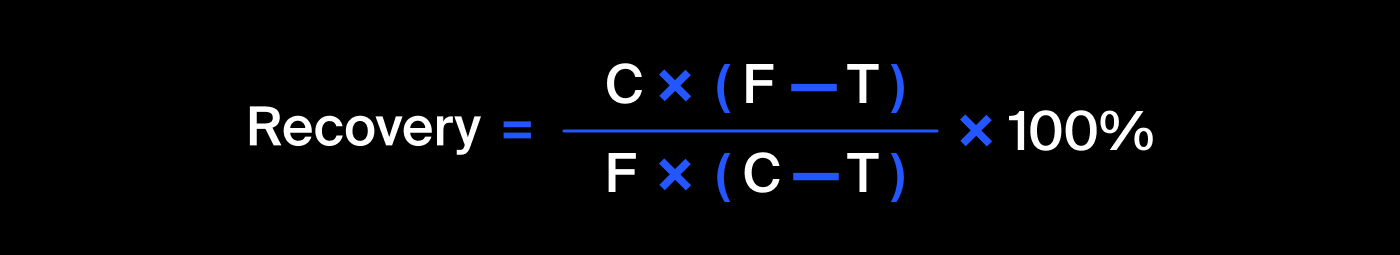

где:
<br> C — доля золота в концентрате после флотации/очистки;<br>
<br>F — доля золота в сырье/концентрате до флотации/очистки;<br>
<br>T — доля золота в отвальных хвостах после флотации/очистки.<br>

In [115]:
#Эффективность обогащение рассчитывается по формуле выше, посчитаем!
C = df_train['rougher.output.concentrate_au']
F = df_train['rougher.input.feed_au']
T = df_train['rougher.output.tail_au']

In [116]:
df_train['recovery'] = ((C*(F-T))/(F*(C-T)))*100
df_train['recovery'].mean()

82.52119968211305

In [117]:
#Cравним с признаком rougher.output.recovery
df_train['rougher.output.recovery'].mean()

82.52119968211304

In [118]:
print(mean_absolute_error(df_train['recovery'], df_train['rougher.output.recovery']))

9.83758577644259e-15


In [119]:
#удалим наш столбец
df_train.drop('recovery', axis=1, inplace=True)

#### Вывод:
Т.к. значение MAE очень маленькое это говорит нам о том, что разницы между нашими расчетами практически нет и эффективнось обогащения рассчитана корректно

###### 1.3. Проанализируем признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся?

In [120]:
# найдем признаки недоступные в тестовой выборке
set(df_train.columns)-set(df_test.columns) 

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

#### Вывод:
Эти признаки отсутствуют в тестовой выборке. Это связано с тем, что онлайн-метрики работают только в работающей системе, а офлайн-метрики вычисляются по историческим данным

###### 1.4. Проведем предобработку данных

In [121]:
#Чтобы была возможность выводить результаты, сделаем словарь
datasets = {
    'df_train': df_train,
    'df_test': df_test,
    'df_full': df_full,
    }

In [122]:
#Взглянем на дубликаты
for name, i in datasets.items():
    duplicates = i.duplicated().sum()    
    print(name,':',duplicates)

df_train : 0
df_test : 0
df_full : 0


In [123]:
# Посмотрим на пропуски
for name, i in datasets.items():
    nan = (i.isna().sum())
    total=nan.sum()
    print(name, ':' ,  total)

df_train : 3050
df_test : 375
df_full : 4481


In [124]:
# Т.к. соседние по времени параметры часто похожи, то применим метод ffil, чтобы дозаполнить отсутствующие знанчения
def fillna(data):
    data = data.fillna(method = 'ffill')
    return data

In [125]:
# Применим функцию
df_train = fillna(df_train)

df_test = fillna(df_test)

df_full= fillna(df_full)

In [126]:
#Пересоздадим словарь
datasets = {
    'df_train': df_train,
    'df_test': df_test,
    'df_full': df_full,
    }

In [127]:
# Проверим результаты работы фуенкции
for name, i in datasets.items():
    nan = (i.isna().sum())
    total=nan.sum()
    print(name, ':' ,  total)

df_train : 0
df_test : 0
df_full : 0


#### Вывод:
Дубликатов не обнаружено, отсутствующие данные заменены с помощью метода ffill. Т.к. параметры часто схожи из-за индексации по времени, мы заполни пустые значения данными из предыдущих строк и сделали проверку выполненой операции

## Анализ данных

###### 2.1. Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах: в сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате. Какие особенности имеют распределения? Опишем выводы.

In [128]:
#Отфилтруем данные для серебра
ag = df_full[['rougher.input.feed_ag','rougher.output.concentrate_ag','primary_cleaner.output.concentrate_ag','final.output.concentrate_ag']]

In [129]:
#Переименуем столбцы
ag = ag.rename(columns={'rougher.input.feed_ag':'Сырье','rougher.output.concentrate_ag': 'Флотация', 
                              'primary_cleaner.output.concentrate_ag': 'Первичная очистка', 
                              'final.output.concentrate_ag': 'Финальная очистка'})

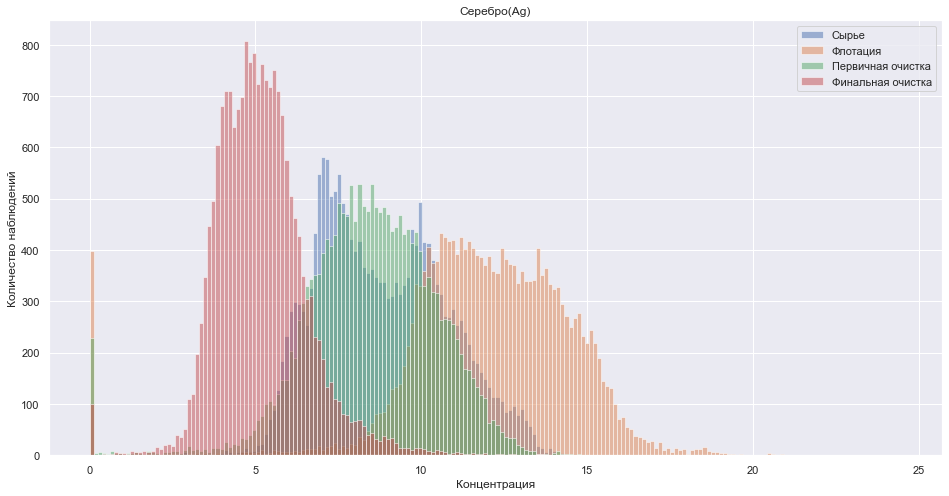

In [130]:
#Построим график
ag.plot(title='Серебро(Ag)',figsize=(16,8),kind='hist',bins=200,alpha=0.5)
plt.xlabel('Концентрация')
plt.ylabel('Количество наблюдений');

In [131]:
#удалим аномалии
df_train = df_train.drop(df_train[df_train['rougher.output.concentrate_ag'] ==0].index)

df_train=df_train.drop(df_train[df_train['final.output.concentrate_ag'] ==0].index)

df_train = df_train.drop(df_train[df_train['primary_cleaner.output.concentrate_ag']==0].index)

In [132]:
#отфильтруем даные для свинца
pb = df_full[['rougher.input.feed_pb','rougher.output.concentrate_pb', 
              'primary_cleaner.output.concentrate_pb', 
              'final.output.concentrate_pb']]

In [133]:
#Переименуем столбцы
pb = pb.rename(columns={'rougher.input.feed_pb': 'Сырье',
    'rougher.output.concentrate_pb': 'Флотация', 
                              'primary_cleaner.output.concentrate_pb': 'Первичная очистка', 
                              'final.output.concentrate_pb': 'Финальная очистка'})

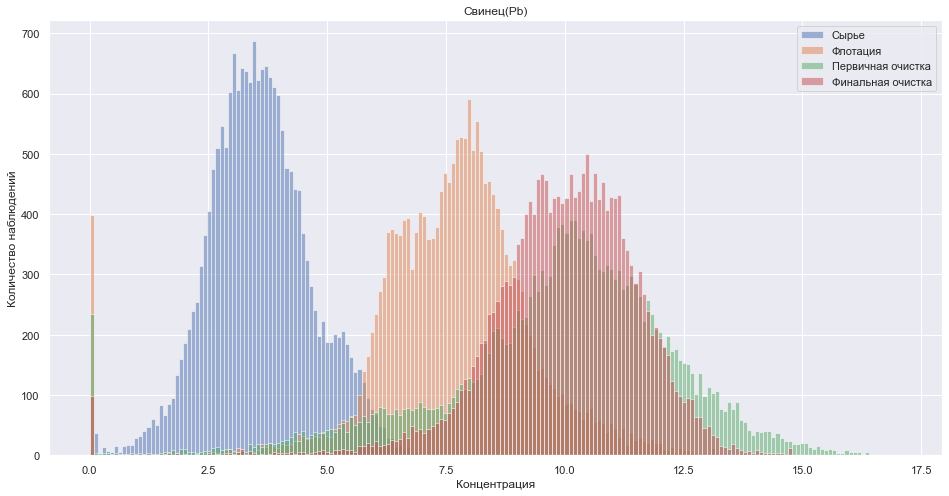

In [134]:
#Построим график
pb.plot(title='Свинец(Pb)',figsize=(16,8),kind='hist',bins=200,alpha=0.5)
plt.xlabel('Концентрация')
plt.ylabel('Количество наблюдений');

In [135]:
#удалим аномалии
df_train = df_train.drop(df_train[df_train['final.output.concentrate_pb'] ==0].index)

df_train=df_train.drop(df_train[df_train['primary_cleaner.output.concentrate_pb'] ==0].index)

df_train = df_train.drop(df_train[df_train['rougher.output.concentrate_pb']==0].index)

In [136]:
#отфильтруем даные для золота
au= df_full[['rougher.input.feed_au','rougher.output.concentrate_au', 
              'primary_cleaner.output.concentrate_au', 
              'final.output.concentrate_au']]

In [137]:
#Переименуем столбцы
au = au.rename(columns={'rougher.input.feed_au': 'Сырье',
    'rougher.output.concentrate_au': 'Флотация', 
                              'primary_cleaner.output.concentrate_au': 'Первичная очистка', 
                              'final.output.concentrate_au': 'Финальная очистка'})

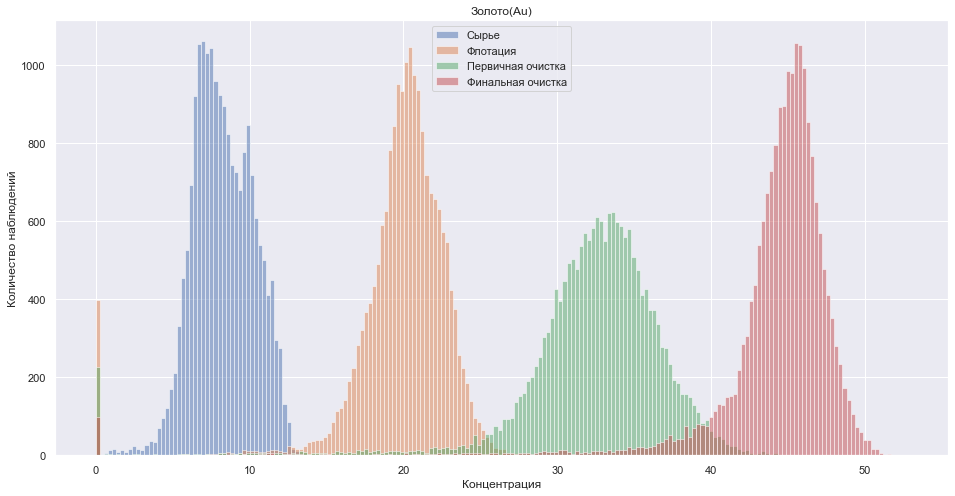

In [138]:
#Построим график
au.plot(title='Золото(Au)',figsize=(16,8),kind='hist',bins=200,alpha=0.5)
plt.xlabel('Концентрация')
plt.ylabel('Количество наблюдений');

In [139]:
#удалим аномалии
df_train = df_train.drop(df_train[df_train['rougher.output.concentrate_au'] ==0].index)

df_train=df_train.drop(df_train[df_train['primary_cleaner.output.concentrate_au'] ==0].index)

df_train = df_train.drop(df_train[df_train['final.output.concentrate_au']==0].index)

#### Вывод:
- Концентрация серебра уменьшается в процессе очистки
- Концетрация свинца значительно вырастает с флотации до первичной очистки, а на дальше растет не так значительно
- Концетрация золота линейно растет от флотации до финальной очистки

######  2.2.  Сравните распределения размеров гранул исходного сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

In [140]:
#отфильтруем даные
train_feed_size=pd.Series(df_train['rougher.input.feed_size'])

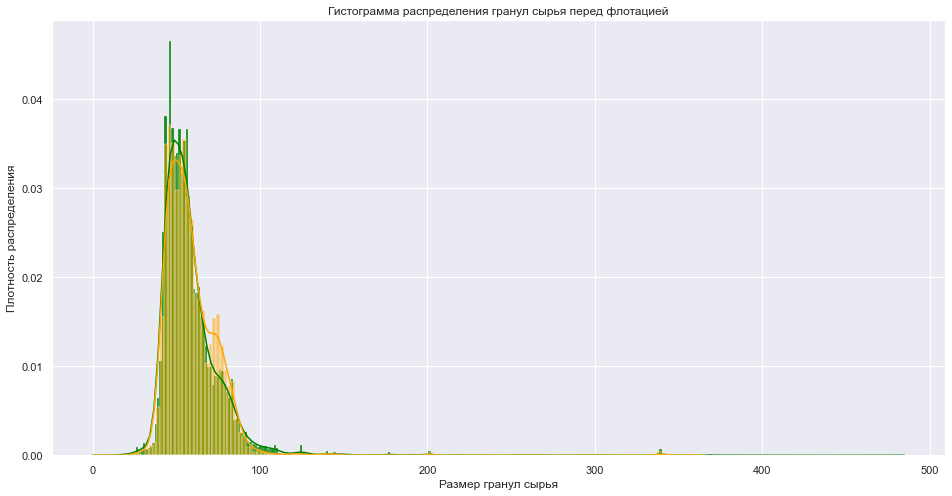

In [141]:
sns.set(rc={'figure.figsize':(16,8)})
plt.title("Гистограмма распределения гранул сырья перед флотацией")
plt.xlabel("Размер гранул сырья")
plt.ylabel("Плотность распределения")
sns.histplot(x=df_train['rougher.input.feed_size'],stat='density',alpha=0.9,color='green',kde=True)
sns.histplot(x=df_test['rougher.input.feed_size'],stat='density',alpha=0.5,color='orange',kde=True);

#### Вывод 
Распределение похоже на нормальное, но со смещением влево, после 120 большое количество выбросов, поэтому мы готовы работать с таким рпспределением. Также распределения для тестовой и тренировочной очень похожи, поэтому мы можем смело брать продолжать с ними работу

######  2.3. Исследуем суммарную концентрацию металлов на разных стадиях: в сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате.

In [142]:
feed = (df_train['rougher.input.feed_au'] + 
                                      df_train['rougher.input.feed_ag'] + 
                                      df_train['rougher.input.feed_pb'] +
                                      df_train['rougher.input.feed_pb'])


final = (df_train['final.output.concentrate_au'] + 
                                      df_train['final.output.concentrate_ag'] + 
                                      df_train['final.output.concentrate_pb'] +
                                      df_train['final.output.concentrate_sol'])
primary = (df_train['primary_cleaner.output.concentrate_au'] + 
                                                df_train['primary_cleaner.output.concentrate_ag'] + 
                                                df_train['primary_cleaner.output.concentrate_pb'] +
                                                df_train['primary_cleaner.output.concentrate_sol'])
rougher = (df_train['rougher.output.concentrate_au'] + 
                                        df_train['rougher.output.concentrate_ag'] + 
                                        df_train['rougher.output.concentrate_pb'] +
                                        df_train['rougher.output.concentrate_sol'])

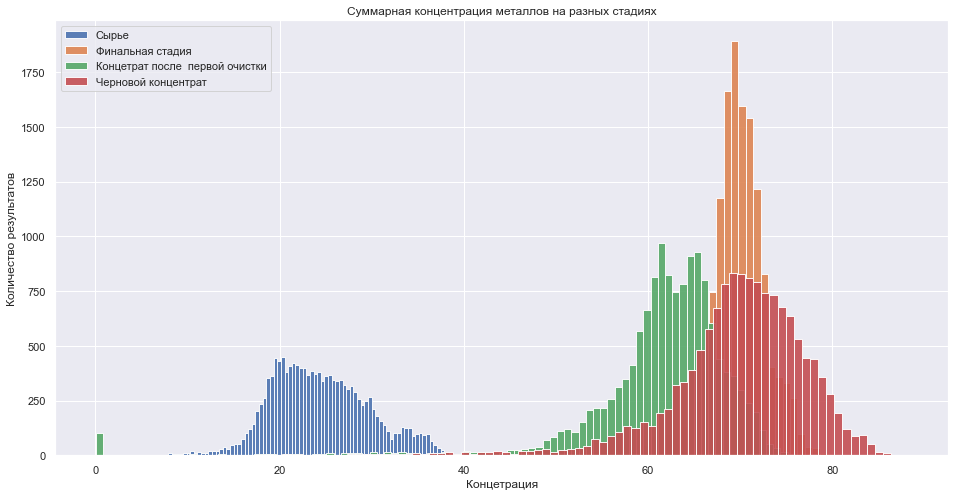

In [143]:
# Перед флотацией
plt.figure(figsize=[16,8])

plt.hist(feed, bins=100, label = 'Сырье', alpha=.90)
plt.hist(final, bins=100, label = 'Финальная стадия', alpha=.90)
plt.hist(primary, bins=100, label = 'Концетрат после  первой очистки', alpha=.90)
plt.hist(rougher, bins=100, label = 'Черновой концентрат', alpha=.90)

#plt.xlim([0, 200])
#plt.ylim([0, 2000])

plt.xlabel("Концетрация")
plt.ylabel("Количество результатов")

plt.legend(loc='upper left')

plt.title('Cуммарная концентрация металлов на разных стадиях')
plt.show()

#### Вывод 
Суммарная концетрации металлов на финальной стадии наиболее высокая

#### Вывод 
 - Выявили, что:
Концентрация серебра уменьшается в процессе очистки
Концетрация свинца значительно вырастает с флотации до первичной очистки, а на дальше растет не так значительно
Концетрация золота линейно растет от флотации до финальной очистки
 - Суммарная концетрация металлов наиболее высока на финальной стадии
 - Очистиили данные от аномальных значений для дальнейшей работы с моделями

## Модель

######  3.1. Напишите функцию для вычисления итоговой sMAPE

In [144]:
#создадим датасет для целевых признаков, недостающих в тестовой выборке
df_target = df_full[['date', 'rougher.output.recovery', 'final.output.recovery']]
df_target.head()

,date,rougher.output.recovery,final.output.recovery
0,2016-01-15 00:00:00,87.107763,70.541216
1,2016-01-15 01:00:00,86.843261,69.266198
2,2016-01-15 02:00:00,86.842308,68.116445
3,2016-01-15 03:00:00,87.226430,68.347543
4,2016-01-15 04:00:00,86.688794,66.927016


In [145]:
#и добавим эти признаки в тестовую выборку из полной
df_test = df_test.merge(df_target, how = 'left', on = 'date')

In [146]:
#Уберерем из обущающего набора ненужные столбцы
df_train = df_train.drop(set(df_train.columns)-set(df_test.columns), axis=1)

In [147]:
#Выделим целевые признаки на обучающей выборке
target_train=df_train[['rougher.output.recovery', 'final.output.recovery']]

In [148]:
#Проверим
target_train.shape

(13982, 2)

In [149]:
target_train

,rougher.output.recovery,final.output.recovery
0,87.107763,70.541216
1,86.843261,69.266198
2,86.842308,68.116445
3,87.226430,68.347543
4,86.688794,66.927016
...,...,...
14574,87.684717,64.054699
14575,90.677361,68.643324
14576,89.574376,73.755150
14577,87.724007,69.049291


In [150]:
#Выделим признаки в обучающей выборке
features_train=df_train.drop(columns=['rougher.output.recovery', 'final.output.recovery','date'])

In [151]:
features_train

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,-404.066986,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,-400.065196,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,-400.074028,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,-400.200179,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,-399.752729,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14574,4.599524,5.822083,4.255546,37.480479,559.895089,85.247019,6.775864,9.005425,1200.454685,-300.012582,...,23.030949,-501.196721,20.034440,-499.842047,18.001504,-499.872052,12.998309,-500.027809,20.007108,-500.850685
14575,4.658125,5.844800,4.241564,37.395565,561.464855,83.860651,6.770561,9.000889,1200.958146,-300.013649,...,23.033246,-500.912210,19.988437,-500.125966,18.011724,-500.090861,13.007108,-500.258238,19.983872,-502.581707
14576,5.335862,6.091855,4.617558,37.369774,560.889077,85.718304,7.762770,9.158609,1199.245914,-300.845518,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
14577,4.838619,6.121323,4.144989,38.591551,559.031805,119.499241,7.356687,9.304952,1196.569267,-299.512227,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608


In [152]:
#Проверим
features_train.shape

(13982, 52)

In [153]:
#Выделим целевые признаки в тествовой выборке
target_test=df_test[['rougher.output.recovery', 'final.output.recovery']]

In [154]:
#Проверим
target_test.shape

(4860, 2)

In [155]:
target_test

,rougher.output.recovery,final.output.recovery
0,89.514960,70.281454
1,89.858126,65.523246
2,91.816623,74.817644
3,88.478959,63.082720
4,89.230316,74.463380
...,...,...
4855,85.462226,68.786981
4856,85.443505,67.839536
4857,87.235441,70.847012
4858,89.299981,72.659046


In [156]:
#Выделим признаки в тестовой выборке
features_test=df_test.drop(columns=['rougher.output.recovery', 'final.output.recovery','date'])

In [157]:
features_test.shape

(4860, 52)

In [158]:
features_test

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,4.365491,6.158718,3.875727,39.135119,555.820208,94.544358,6.146982,9.308612,1196.238112,-299.862743,...,23.018622,-500.492702,20.020205,-500.220296,17.963512,-499.939490,12.990306,-500.080993,19.990336,-499.191575
1,4.362781,6.048130,3.902537,39.713906,544.731687,123.742430,6.210119,9.297709,1201.904177,-299.907308,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471
2,5.081681,6.082745,4.564078,37.208683,558.155110,82.610855,7.363824,9.003562,1200.826926,-300.124116,...,22.993827,-501.559663,20.029144,-500.000662,18.012723,-500.024764,13.016445,-500.058432,19.973767,-501.394155
3,5.145949,6.084374,4.768124,36.808874,539.713765,77.984784,6.927072,8.955597,1199.292489,-299.778385,...,23.032807,-501.287889,19.977466,-500.159903,17.980463,-500.504602,12.949071,-500.009937,20.010332,-508.337973
4,5.735249,6.165220,4.512346,37.810642,558.713584,86.434874,7.823471,7.490356,1198.005449,-300.283401,...,23.001911,-499.947838,20.023735,-499.713680,17.990955,-500.334769,13.007523,-499.968459,19.995999,-499.788805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4855,6.620245,5.992592,2.589242,39.934641,578.654582,63.473450,14.688804,6.898599,999.688257,-399.217124,...,14.003057,-503.152258,12.016724,-501.136446,10.041864,-499.338844,8.007022,-500.279583,14.001271,-602.072365
4856,6.741324,6.158617,2.647185,40.176307,571.622005,62.815291,14.892720,6.903204,1000.479783,-399.574748,...,14.031220,-503.471307,11.966426,-500.656842,10.051620,-498.318772,8.018091,-499.696138,13.958937,-599.213013
4857,6.627458,6.015149,2.466127,39.841423,563.733146,61.287347,13.723692,6.700148,1000.014718,-400.320877,...,13.996317,-502.995300,11.980055,-500.607751,9.964501,-499.261719,8.065048,-499.492395,13.997801,-600.621416
4858,6.702243,6.097592,2.278955,37.728375,549.812490,59.637037,13.746510,6.706417,999.635748,-399.484884,...,13.983963,-503.675714,11.928745,-500.583183,9.970359,-498.822343,8.016377,-499.013145,14.000032,-600.024741


In [159]:
# Функция вычисления smape
def smape(target, pred):
  
    
    smape = abs(target-pred)/((abs(target)+abs(pred))/2)*100  

    smape = np.mean(smape)
    return smape

In [160]:
# make_scorer для генерации объекта скоринга
smape_scorer=make_scorer(smape, greater_is_better=False)

##### Линейная регрессия

In [161]:
#Модель
model_lr=LinearRegression()

In [162]:
#Кросс-валидация для LinearRegression() rougher
rougher_lr=cross_val_score(model_lr,features_train,target_train['rougher.output.recovery'],scoring=smape_scorer,cv=5)
smape_rougher_lr=np.mean(abs(rougher_lr))
print('Средняя оценка качества модели sMape',smape_rougher_lr)

Средняя оценка качества модели sMape 7.033526267626021


In [163]:
#Кросс-валидация для LinearRegression() final
final_lr=cross_val_score(model_lr,features_train,target_train['final.output.recovery'],scoring=smape_scorer,cv=5)
smape_final_lr=np.mean(abs(final_lr))
print('Средняя оценка качества модели sMape',smape_final_lr)

Средняя оценка качества модели sMape 9.477249908910105


In [164]:
print('Итоговое sMAPE',0.25 *smape_rougher_lr+0.75*smape_final_lr)

Итоговое sMAPE 8.866318998589085


##### Дерево решений

In [165]:
# модель rougher
model_dt_rougher = DecisionTreeRegressor(random_state=12345)
# подберем оптимальные параметры глубины дерева
parameters = {'max_depth': [x for x in range(1, 10, 1)]}

model_dr_rougher = GridSearchCV(model_dt_rougher,
                               parameters, 
                               cv=5, 
                               scoring=smape_scorer)
model_dr_rougher.fit(features_train, target_train['rougher.output.recovery'])

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=12345),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             scoring=make_scorer(smape, greater_is_better=False))

In [166]:
print('Лучшие параметры',model_dr_rougher.best_params_)
print('Средняя оценка качества модели sMape', abs(model_dr_rougher.best_score_))

Лучшие параметры {'max_depth': 6}
Средняя оценка качества модели sMape 6.690623787776895


In [167]:
# модель final
model_dt_final = DecisionTreeRegressor(random_state=12345)
# подберем оптимальные параметры глубины дерева
parameters = {'max_depth': [x for x in range(1, 10, 1)]}

model_dt_final = GridSearchCV(model_dt_final,
                               parameters, 
                               cv=5, 
                               scoring=smape_scorer)
model_dt_final.fit(features_train, target_train['final.output.recovery'])

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=12345),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             scoring=make_scorer(smape, greater_is_better=False))

In [168]:
print('Лучшие параметры',model_dt_final.best_params_)
print('Средняя оценка качества модели sMape', abs(model_dt_final.best_score_))

Лучшие параметры {'max_depth': 3}
Средняя оценка качества модели sMape 9.211340584742238


In [169]:
print('Итоговое sMAPE',0.25 *abs(model_dr_rougher.best_score_)+0.75*abs(model_dt_final.best_score_))

Итоговое sMAPE 8.581161385500902


##### Случайный лес

In [170]:
#модель rougher
model_rf_rougher = RandomForestRegressor(random_state=12345)

# подберем оптимальные параметры
parameters = { 'max_depth': [x for x in range(1, 5, 1)],
               'n_estimators': [x for x in range(1, 10, 2)]
             }

model_rf_rougher = GridSearchCV(model_rf_rougher, 
                               parameters, 
                               cv=5, 
                               scoring=smape_scorer
                              )
model_rf_rougher.fit(features_train, target_train['rougher.output.recovery'])

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=12345),
             param_grid={'max_depth': [1, 2, 3, 4],
                         'n_estimators': [1, 3, 5, 7, 9]},
             scoring=make_scorer(smape, greater_is_better=False))

In [171]:
print('Лучшие параметры: ', model_rf_rougher.best_params_)
print('Средняя оценка качества модели sMape', abs(model_rf_rougher.best_score_))

Лучшие параметры:  {'max_depth': 4, 'n_estimators': 9}
Средняя оценка качества модели sMape 6.640299398770597


In [172]:
#модель final
model_rf_final = RandomForestRegressor(random_state=12345)

# подберем оптимальные параметры глубины дерева
parameters = { 'max_depth': [x for x in range(1, 5, 1)],
               'n_estimators': [x for x in range(1, 10, 2)]
             }

model_rf_final = GridSearchCV(model_rf_final, 
                               parameters, 
                               cv=5, 
                               scoring=smape_scorer
                              )
model_rf_final.fit(features_train, target_train['final.output.recovery'])

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=12345),
             param_grid={'max_depth': [1, 2, 3, 4],
                         'n_estimators': [1, 3, 5, 7, 9]},
             scoring=make_scorer(smape, greater_is_better=False))

In [173]:
print('Лучшие параметры: ', model_rf_final.best_params_)
print('Средняя оценка качества модели sMape',abs(model_rf_final.best_score_))

Лучшие параметры:  {'max_depth': 2, 'n_estimators': 3}
Средняя оценка качества модели sMape 8.84881552499057


In [174]:
print(0.25 *abs(model_rf_rougher.best_score_)+0.75*abs(model_rf_final.best_score_))

8.296686493435576


#### Вывод 
Наилучший результат показала модель "Случайный лес"

##### Применим модель на тестовой выборке

In [175]:
#напишем функцию 
def model_test(features_train, target_train, features_test, depth,estimators):
    
    model_test = RandomForestRegressor(random_state=12345,max_depth=depth,n_estimators=estimators)    
    model_test.fit(features_train, target_train)
    model_test_predict = model_test.predict(features_test)

    return model_test_predict

In [176]:
#Для roughter
model_roughter = RandomForestRegressor(max_depth=4, n_estimators=9, random_state=12345) 
model_roughter.fit(features_train, target_train)
predictions_test = model_roughter.predict(features_test)

In [177]:
test_roughter=model_test(features_train, target_train['rougher.output.recovery'], features_test, 4,9)


In [178]:
#Расчитаем для final для тестовой выборки
test_final=model_test(features_train, target_train['final.output.recovery'], features_test, 2,3)

In [179]:
#Получим smape для rougter
roughter=smape(target_test['rougher.output.recovery'],test_roughter)

In [180]:
#Получим smape для final
final=smape(target_test['final.output.recovery'],test_final)

In [181]:
print('Итоговая оценка smape на тестовых данных равна', 0.25 *roughter+0.75*final)

Итоговая оценка smape на тестовых данных равна 7.433890394805204


In [182]:
#напишем функцию 
def dummy_test(features_train, target_train, features_test):    
    dummy_regr = DummyRegressor(strategy = "mean")    
    dummy_regr.fit(features_train, target_train)
    dummy_regr_predict = dummy_regr.predict(features_test)

    return dummy_regr_predict

In [183]:
#Для roughter
dummy_roughter=dummy_test(features_train, target_train['rougher.output.recovery'], features_test)

#Для final
dummy_final=dummy_test(features_train, target_train['final.output.recovery'], features_test)

In [184]:
#Получим smape для rougter
dummy_roughter=smape(target_test['rougher.output.recovery'],dummy_roughter)

In [185]:
#Получим smape для final
dummy_final=smape(target_test['final.output.recovery'],dummy_final)

In [186]:
print('Итоговая оценка smape на тестовых данных равна', 0.25 *dummy_roughter+0.75*dummy_final)

Итоговая оценка smape на тестовых данных равна 8.471903961218104


#### Вывод 
Итоговый расчёт на тестовых данных наилучшей модели random forest позволил получить прогноз целевых признаков концентрации золота для этапа флотации и финальной очистки с итоговым показателем sMAPE равным 7,43. Результат нашей модели получился лучше результата константной